### Emissão de gases por setor

Agora vamos em busca de duas informações:

- Descobrir quais são os setores mais poluentes para cada gás;
- Descobrir quais são os gases mais poluentes para cada setor.

In [1]:
# imports

import pandas as pd

In [3]:
dados = pd.read_csv("./dados/dados_unid_II.csv", sep=";", low_memory=False)

In [5]:
dados.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,ANO,EMISSÃO
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0


#### Gases Poluentes por Setor

In [7]:
gases_por_setor = dados.groupby(['Nível 1 - Setor', 'Gás'])[["EMISSÃO"]].sum()

In [13]:
gases_por_setor

EMISSÃO
Nível 1 - Setor Gás                           
Agropecuária    CH4 (t)           5.928481e+08
                CO (t)            7.132479e+07
                CO2 (t)           5.411750e+08
                CO2e (t) GTP-AR2  8.297112e+09
                CO2e (t) GTP-AR4  8.297112e+09
...                                        ...
Resíduos        CO2e (t) GWP-AR2  1.769016e+09
                CO2e (t) GWP-AR4  2.081997e+09
                CO2e (t) GWP-AR5  2.310099e+09
                CO2e (t) GWP-AR6  2.233335e+09
                N2O (t)           2.764127e+05

[72 rows x 1 columns]

In [11]:
gases_por_setor.xs("CO2 (t)", level=1)

,EMISSÃO
Nível 1 - Setor,
Agropecuária,5.411750e+08
Energia,1.261352e+10
Mudança de Uso da Terra e Floresta,3.733930e+10
Processos Industriais,2.729603e+09
Resíduos,2.276264e+07


In [15]:
gases_por_setor.xs("CO2 (t)", level=1).idxmax()

EMISSÃO    Mudança de Uso da Terra e Floresta
dtype: object

In [17]:
gases_por_setor.xs("CO2 (t)", level=1).max()

EMISSÃO    3.733930e+10
dtype: float64

In [19]:
gases_por_setor.groupby(level=1).idxmax()

,EMISSÃO
Gás,
C2F6 (t),"(Processos Industriais, C2F6 (t))"
CF4 (t),"(Processos Industriais, CF4 (t))"
CH4 (t),"(Agropecuária, CH4 (t))"
CO (t),"(Energia, CO (t))"
CO2 (t),"(Mudança de Uso da Terra e Floresta, CO2 (t))"
CO2e (t) GTP-AR2,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
CO2e (t) GTP-AR4,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
CO2e (t) GTP-AR5,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
CO2e (t) GTP-AR6,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."


In [21]:
gases_por_setor.groupby(level=0).idxmax()

,EMISSÃO
Nível 1 - Setor,
Agropecuária,"(Agropecuária, CO2e (t) GWP-AR5)"
Energia,"(Energia, CO2e (t) GWP-AR6)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
Processos Industriais,"(Processos Industriais, CO2e (t) GWP-AR6)"
Resíduos,"(Resíduos , CO2e (t) GWP-AR5)"


In [23]:
valores_maximos_gases = gases_por_setor.groupby(level=1).max().values
tabela_sumarizada = gases_por_setor.groupby(level=1).idxmax()
tabela_sumarizada.insert(1,"QTD EMISSÃO", valores_maximos_gases)
tabela_sumarizada

,EMISSÃO,QTD EMISSÃO
Gás,,
C2F6 (t),"(Processos Industriais, C2F6 (t))",5.765018e+02
CF4 (t),"(Processos Industriais, CF4 (t))",7.135481e+03
CH4 (t),"(Agropecuária, CH4 (t))",5.928481e+08
CO (t),"(Energia, CO (t))",3.959769e+08
CO2 (t),"(Mudança de Uso da Terra e Floresta, CO2 (t))",3.733930e+10
CO2e (t) GTP-AR2,"(Mudança de Uso da Terra e Floresta, CO2e (t) ...",3.850044e+10
CO2e (t) GTP-AR4,"(Mudança de Uso da Terra e Floresta, CO2e (t) ...",3.850044e+10
CO2e (t) GTP-AR5,"(Mudança de Uso da Terra e Floresta, CO2e (t) ...",3.831675e+10
CO2e (t) GTP-AR6,"(Mudança de Uso da Terra e Floresta, CO2e (t) ...",3.843359e+10


In [25]:
gases_por_setor

EMISSÃO
Nível 1 - Setor Gás                           
Agropecuária    CH4 (t)           5.928481e+08
                CO (t)            7.132479e+07
                CO2 (t)           5.411750e+08
                CO2e (t) GTP-AR2  8.297112e+09
                CO2e (t) GTP-AR4  8.297112e+09
...                                        ...
Resíduos        CO2e (t) GWP-AR2  1.769016e+09
                CO2e (t) GWP-AR4  2.081997e+09
                CO2e (t) GWP-AR5  2.310099e+09
                CO2e (t) GWP-AR6  2.233335e+09
                N2O (t)           2.764127e+05

[72 rows x 1 columns]

In [ ]:
Nível 1 - Setor

In [47]:
gases_por_setor.swaplevel(0,1).groupby(["Gás", "Nível 1 - Setor"])[["EMISSÃO"]].sum()

EMISSÃO
Gás      Nível 1 - Setor                                 
C2F6 (t) Processos Industriais               5.765018e+02
CF4 (t)  Processos Industriais               7.135481e+03
CH4 (t)  Agropecuária                        5.928481e+08
         Energia                             3.429034e+07
         Mudança de Uso da Terra e Floresta  8.662166e+07
...                                                   ...
N2O (t)  Resíduos                            2.764127e+05
NOx (t)  Agropecuária                        2.602719e+06
         Energia                             9.361215e+07
         Processos Industriais               3.546360e+06
SF6 (t)  Processos Industriais               4.705800e+02

[72 rows x 1 columns]

In [135]:
gases_por_setor.swaplevel(0,1).groupby(level = 0).idxmax()

,EMISSÃO
Gás,
C2F6 (t),"(C2F6 (t), Processos Industriais)"
CF4 (t),"(CF4 (t), Processos Industriais)"
CH4 (t),"(CH4 (t), Agropecuária)"
CO (t),"(CO (t), Energia)"
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)"
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F..."


In [49]:
dados

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,ANO,EMISSÃO
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


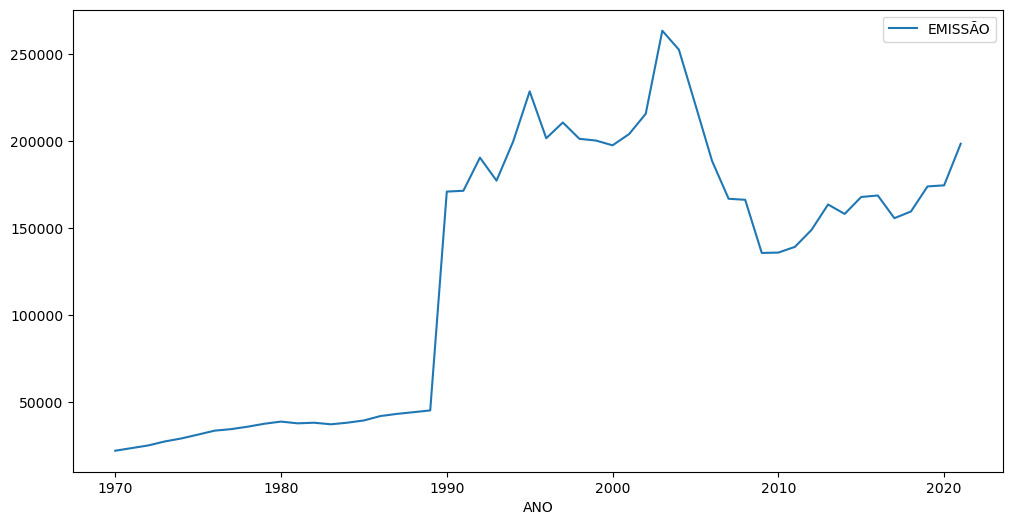

In [59]:
dados.groupby("ANO")[['EMISSÃO']].mean().plot(figsize=(12,6));

In [61]:
# ano com a média de emissão maior
dados.groupby("ANO")[['EMISSÃO']].mean().idxmax()


EMISSÃO    2003
dtype: int64

In [67]:
media_emissao_anual_gases = dados.groupby(["ANO","Gás"])[['EMISSÃO']].mean().reset_index()
media_emissao_anual_gases

,ANO,Gás,EMISSÃO
0,1970,C2F6 (t),0.232610
1,1970,CF4 (t),3.557421
2,1970,CH4 (t),1471.024024
3,1970,CO (t),2155.556658
4,1970,CO2 (t),19244.913199
...,...,...,...
1191,2021,HFC-23 (t),0.000000
1192,2021,HFC-32 (t),261.100000
1193,2021,N2O (t),119.295311
1194,2021,NOx (t),679.395431


In [71]:
media_emissao_anual_gases = media_emissao_anual_gases.pivot_table(index="ANO", columns="Gás", values="EMISSÃO")
media_emissao_anual_gases

Gás,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,CO2e (t) GWP-AR2,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
ANO,,,,,,,,,,,,,,,,,,,,,
1970,0.232610,3.557421,1471.024024,2155.556658,19244.913199,20821.379814,20821.379814,19162.726020,19775.283385,35396.183865,...,742.074863,0.000000,0.000000,0.000000,0.0,0.00,0.00,31.632709,154.072797,0.000
1971,0.334611,5.117360,1525.506914,2259.625805,21598.587743,22466.288595,22466.288595,20748.481445,21386.175802,37570.982886,...,730.119047,0.000000,0.000000,0.000000,0.0,0.00,0.00,32.609237,170.550178,0.000
1972,0.404684,6.189025,1584.719568,2418.944795,23664.445521,24100.305265,24100.305265,22303.224240,22966.797327,39800.768350,...,774.278817,0.000000,0.000000,0.000000,0.0,0.00,0.00,34.311864,188.856161,0.000
1973,0.463147,7.083136,1642.612439,2596.053853,27726.668829,26683.827206,26683.827206,24827.077028,25516.409611,42947.755490,...,796.866394,0.000000,0.000000,0.000000,0.0,0.00,0.00,35.278689,217.320480,0.000
1974,0.471026,7.203619,1704.614365,2681.450599,30155.918952,28539.318732,28539.318732,26600.481407,27321.124852,45431.240064,...,1024.694923,0.000000,0.000000,0.000000,0.0,0.00,0.00,37.098183,247.521415,0.000
1975,0.502952,7.691893,1854.360821,2730.894830,32292.965771,30593.767465,30593.767465,28507.669059,29285.642221,48944.729581,...,1065.682750,0.000000,0.000000,0.000000,0.0,0.00,0.00,39.451008,262.716346,0.000
1976,0.577172,8.826970,1932.641716,2702.494362,35640.344723,33066.878007,33066.878007,30879.481709,31693.226162,52203.028009,...,1091.778909,0.000000,0.000000,0.000000,0.0,0.00,0.00,41.583225,287.013048,0.000
1977,0.692855,10.596169,1931.897645,2675.992077,37313.909077,34182.312333,34182.312333,31967.243034,32784.131397,53333.605735,...,1147.712448,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.571086,292.405821,0.000
1978,0.749660,11.464915,1921.281930,2755.891877,40669.820049,35969.633601,35969.633601,33762.778999,34580.720998,55015.291182,...,1289.853564,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.426649,322.982906,0.000


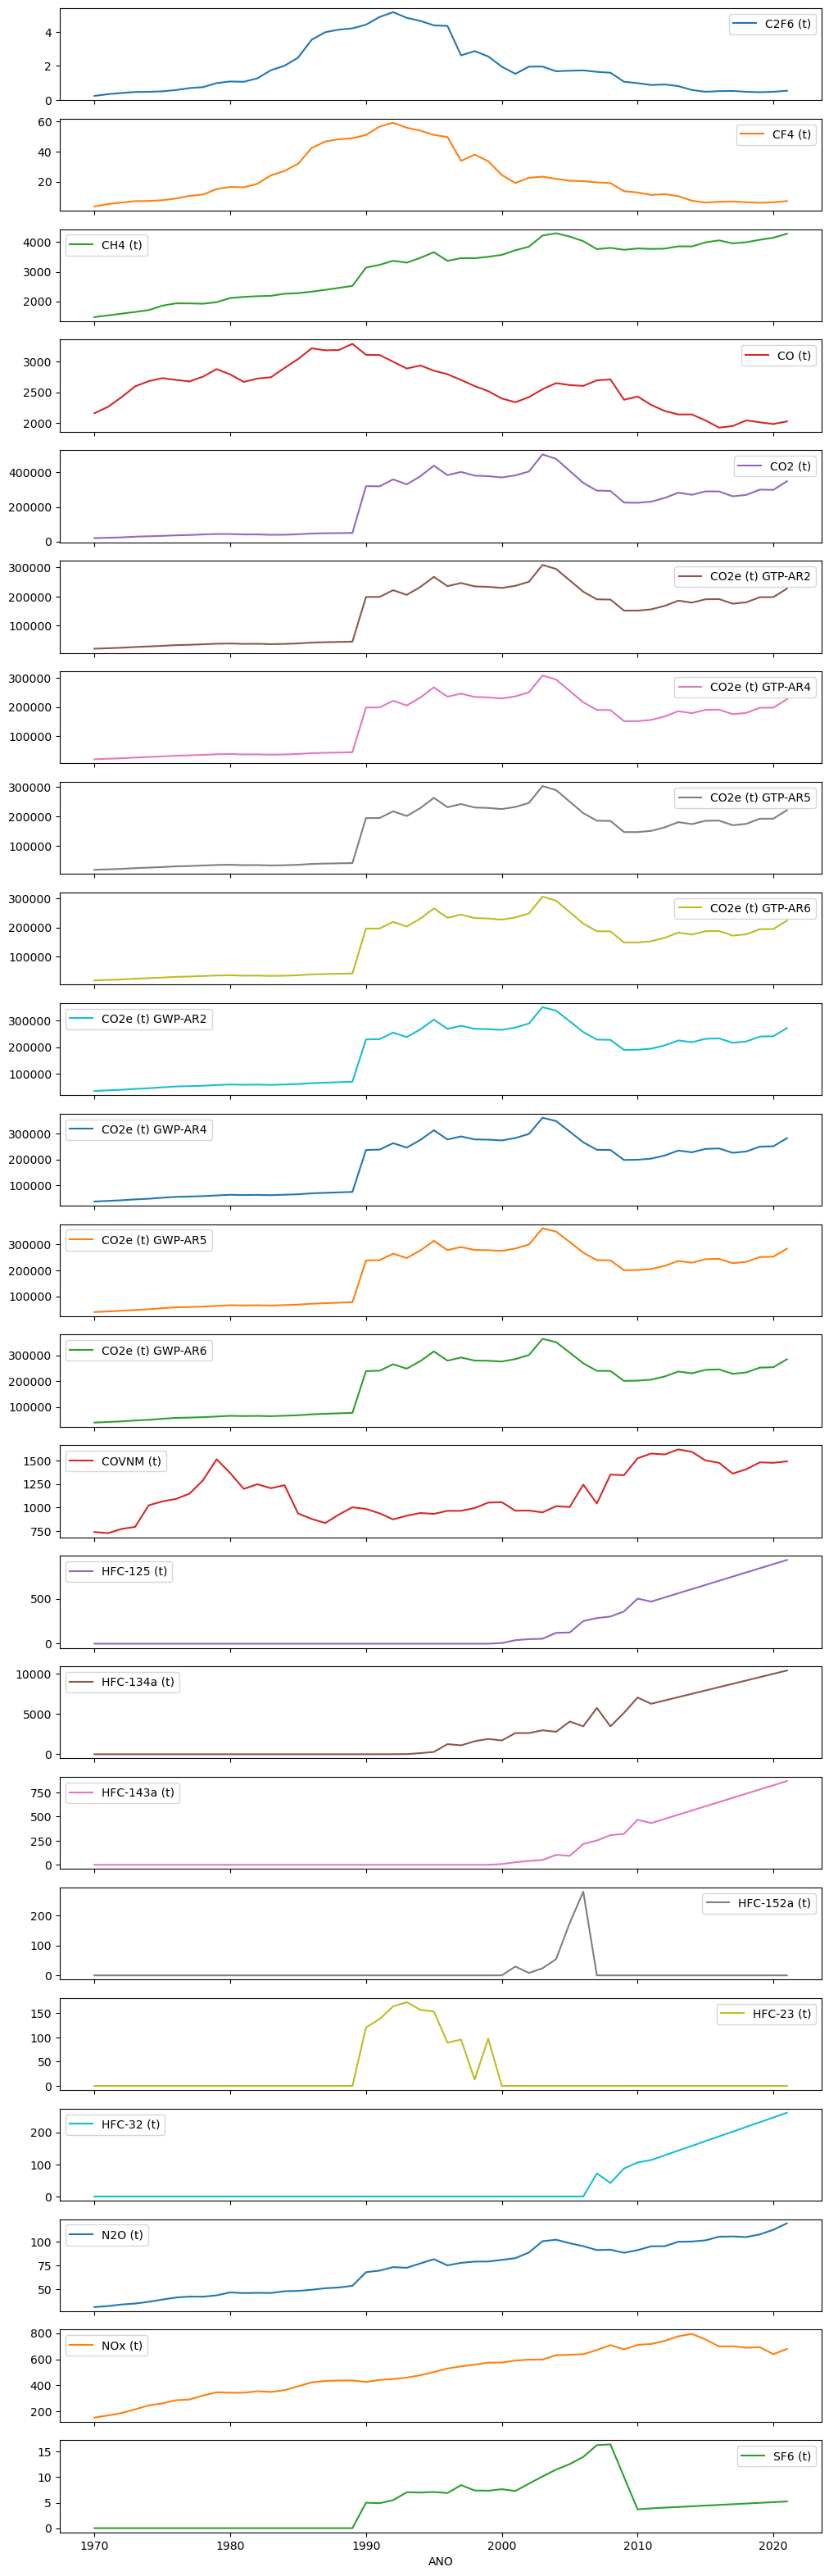

In [77]:
media_emissao_anual_gases.plot(subplots=True, figsize=(12,40));

## Desafios

A equipe de supervisão deseja saber agora a média de emissão para cada um dos setores econômicos da coluna "Nível 1 - Setor" ao longo dos anos. Como desafio, crie uma tabela de pivô e uma visualização gráfica contendo essas informações, utilizando apenas o método pivot_table para a construção da tabela, sem utilizar o método groupby.

In [82]:
media_emissao_anual_setor = dados.groupby(["ANO","Nível 1 - Setor"])[['EMISSÃO']].mean().reset_index()
media_emissao_anual_setor

,ANO,Nível 1 - Setor,EMISSÃO
0,1970,Agropecuária,49292.425313
1,1970,Energia,15939.703116
2,1970,Mudança de Uso da Terra e Floresta,0.000000
3,1970,Processos Industriais,106549.168676
4,1970,Resíduos,11684.883558
...,...,...,...
255,2021,Agropecuária,149793.768835
256,2021,Energia,72928.637234
257,2021,Mudança de Uso da Terra e Floresta,690085.511209
258,2021,Processos Industriais,787101.255789


In [84]:
media_emissao_anual_setor = media_emissao_anual_setor.pivot_table(index="ANO", columns="Nível 1 - Setor", values="EMISSÃO")
media_emissao_anual_setor

Nível 1 - Setor,Agropecuária,Energia,Mudança de Uso da Terra e Floresta,Processos Industriais,Resíduos
ANO,,,,,
1970,49292.425313,15939.703116,0.000000e+00,106549.168676,11684.883558
1971,51199.559433,17698.989894,0.000000e+00,111532.507753,12676.706849
1972,53508.935498,19092.876761,0.000000e+00,125701.525455,13709.697850
1973,55494.006224,22062.085929,0.000000e+00,137657.110402,14715.248028
1974,57896.513900,23810.659474,0.000000e+00,149941.779638,15710.616150
1975,63303.098508,25036.433686,0.000000e+00,168471.860169,16667.446706
1976,66347.533521,27214.281091,0.000000e+00,193826.482068,17539.505222
1977,66977.413505,27645.258640,0.000000e+00,231505.609283,18462.455148
1978,66640.432009,29734.461056,0.000000e+00,255736.210711,19327.840165


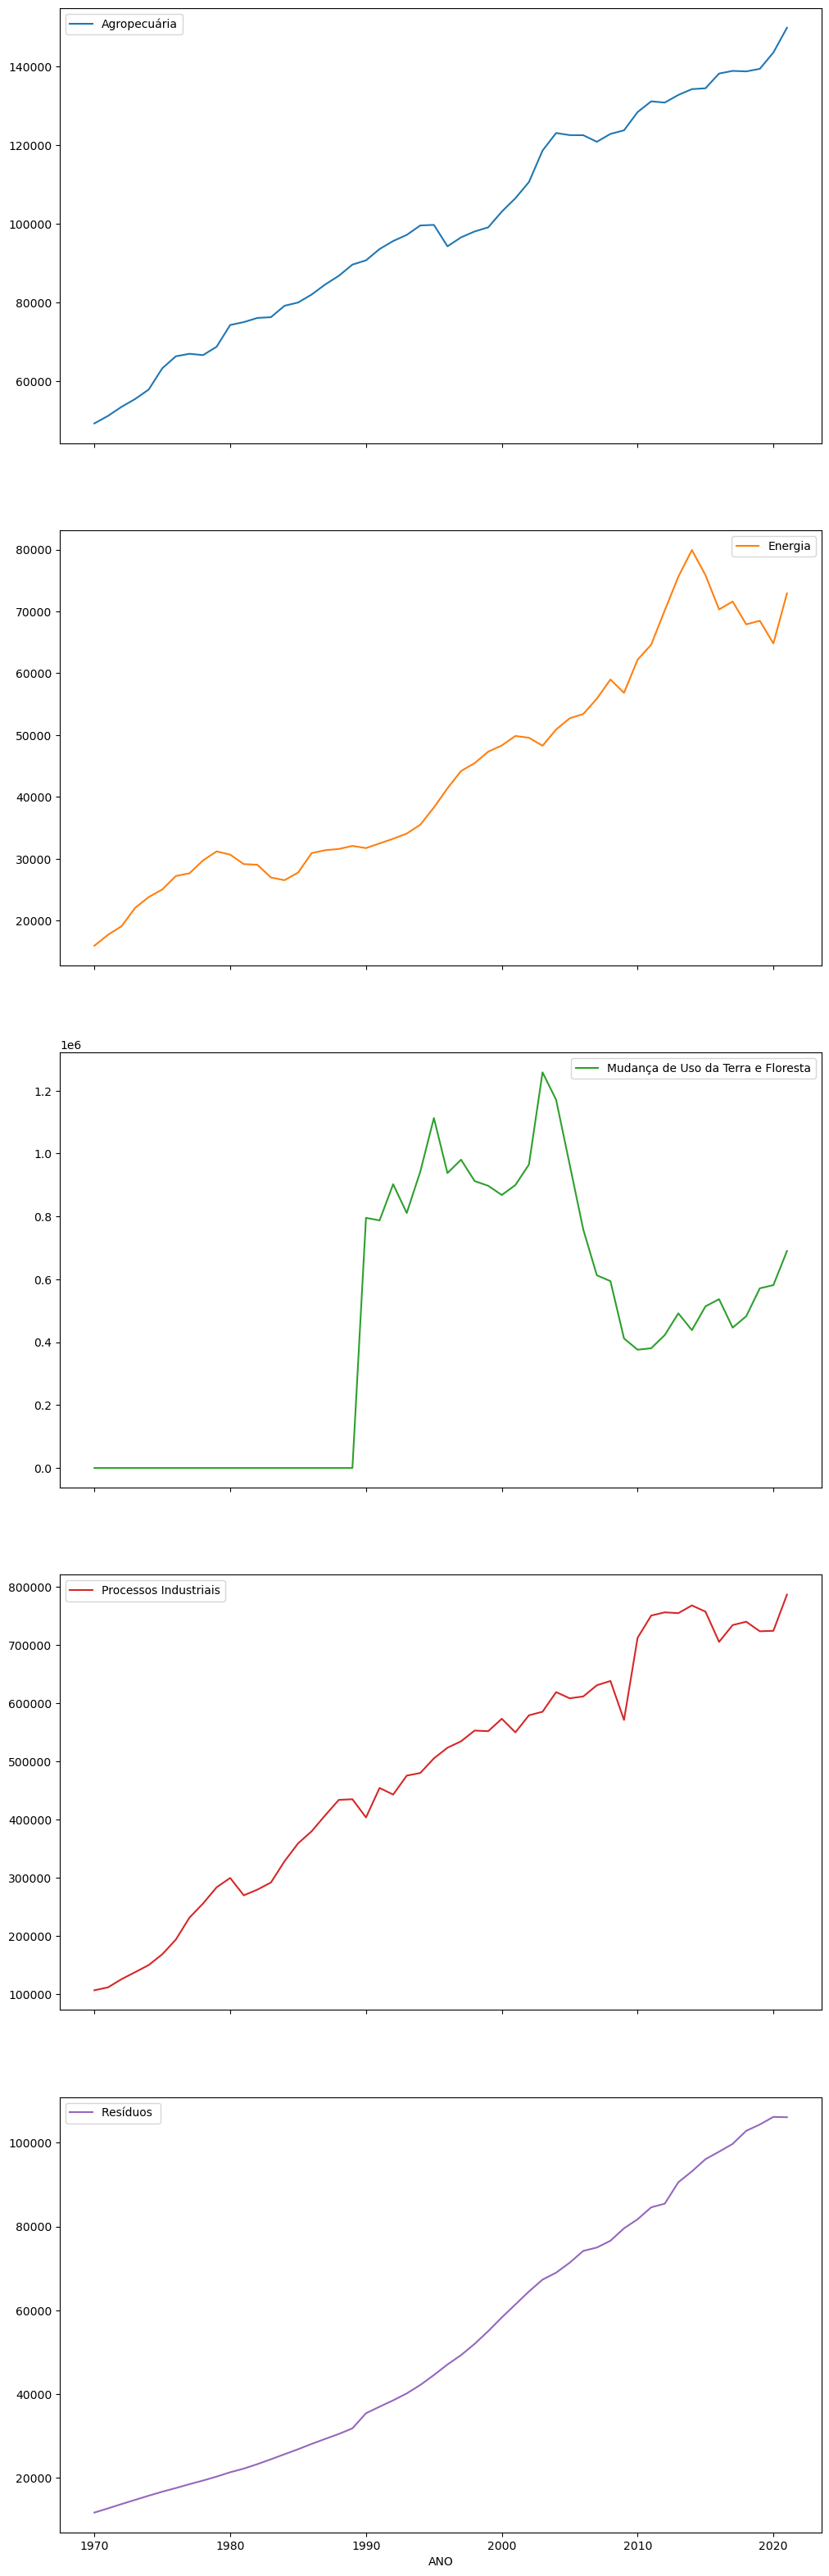

In [90]:
media_emissao_anual_setor.plot(subplots=True, figsize=(12,40));

### Faça um agrupamento de dados com as colunas "Estado" e "Nível 1 - Setor", obtendo a soma de emissão e armazenando o resultado em uma tabela.

In [100]:
dados_emissao_total_estado_setor = dados.groupby(['Estado', 'Nível 1 - Setor'])[['EMISSÃO']].sum()
dados_emissao_total_estado_setor

EMISSÃO
Estado Nível 1 - Setor                                 
AC     Agropecuária                        7.270206e+08
       Energia                             2.071751e+08
       Mudança de Uso da Terra e Floresta  7.847879e+09
       Resíduos                            2.928323e+07
AL     Agropecuária                        7.628303e+08
...                                                 ...
TO     Agropecuária                        2.762475e+09
       Energia                             5.130379e+08
       Mudança de Uso da Terra e Floresta  9.435591e+09
       Processos Industriais               2.613905e+07
       Resíduos                            6.177003e+07

[132 rows x 1 columns]

### Utilizando a tabela construída na atividade 1, selecione os dados referentes à "Energia" do índice "Nível 1 - Setor".

In [103]:
dados_emissao_total_estado_setor.xs('Energia', level=1)

,EMISSÃO
Estado,
AC,2.071751e+08
AL,5.958697e+08
AM,1.916462e+09
AP,2.638059e+08
BA,4.801368e+09
CE,1.879584e+09
DF,9.487860e+08
ES,2.201326e+09
GO,2.761709e+09


### Utilizando a tabela construída na atividade 1, encontre a atividade econômica com valor máximo de emissão do Estado de Minas Gerais

In [106]:
dados_emissao_total_estado_setor.xs("MG").idxmax()

EMISSÃO    Agropecuária
dtype: object

In [108]:
dados_emissao_total_estado_setor.loc['MG']

,EMISSÃO
Nível 1 - Setor,
Agropecuária,1.445325e+10
Energia,9.663844e+09
Mudança de Uso da Terra e Floresta,1.262467e+10
Processos Industriais,6.806110e+09
Resíduos,1.111180e+09


### Obtenha uma tabela contendo a atividade econômica com máxima emissão para cada Estado.

In [133]:
valores_max_estados = dados_emissao_total_estado_setor.groupby(level=0).max().values
tabela_sumarizada_estado = dados_emissao_total_estado_setor.groupby(level=0).idxmax()
tabela_sumarizada_estado.insert(1, "QTD EMISSÃO", valores_max_estados)
tabela_sumarizada_estado

,EMISSÃO,QTD EMISSÃO
Estado,,
AC,"(AC, Mudança de Uso da Terra e Floresta)",7.847879e+09
AL,"(AL, Agropecuária)",7.628303e+08
AM,"(AM, Mudança de Uso da Terra e Floresta)",1.549303e+10
AP,"(AP, Mudança de Uso da Terra e Floresta)",1.279214e+09
BA,"(BA, Mudança de Uso da Terra e Floresta)",1.121511e+10
CE,"(CE, Energia)",1.879584e+09
DF,"(DF, Energia)",9.487860e+08
ES,"(ES, Processos Industriais)",2.344011e+09
GO,"(GO, Agropecuária)",1.187803e+10


In [147]:
dados_emissao_total_estado_setor

EMISSÃO
Estado Nível 1 - Setor                                 
AC     Agropecuária                        7.270206e+08
       Energia                             2.071751e+08
       Mudança de Uso da Terra e Floresta  7.847879e+09
       Resíduos                            2.928323e+07
AL     Agropecuária                        7.628303e+08
...                                                 ...
TO     Agropecuária                        2.762475e+09
       Energia                             5.130379e+08
       Mudança de Uso da Terra e Floresta  9.435591e+09
       Processos Industriais               2.613905e+07
       Resíduos                            6.177003e+07

[132 rows x 1 columns]

### Obtenha uma tabela contendo o Estado com máxima emissão para cada atividade econômica.

In [154]:
dados_emissao_total_estado_setor.groupby(level=1).idxmax()

,EMISSÃO
Nível 1 - Setor,
Agropecuária,"(MG, Agropecuária)"
Energia,"(SP, Energia)"
Mudança de Uso da Terra e Floresta,"(PA, Mudança de Uso da Terra e Floresta)"
Processos Industriais,"(MG, Processos Industriais)"
Resíduos,"(SP, Resíduos )"
